**LOGISTIC REGRESSION**

**Using libraries**

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



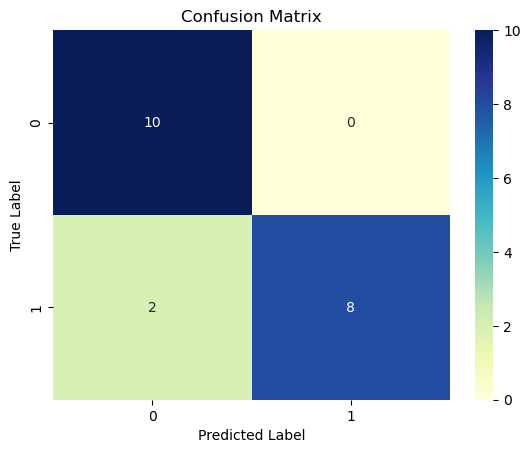

AUC Score: 0.9700000000000001


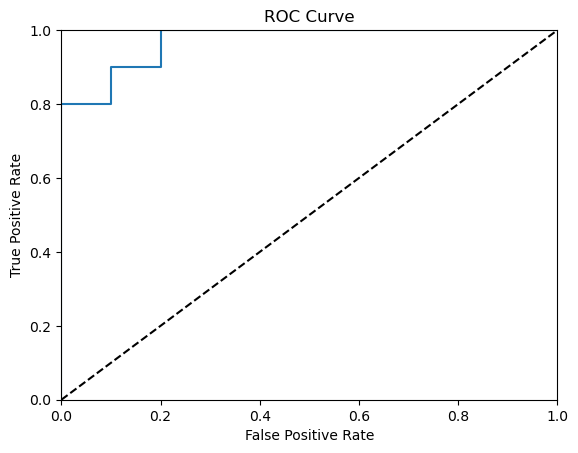

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


data = pd.read_csv('/kaggle/input/placement/placement.csv')


X = data.drop('placement', axis=1)  
y = data['placement']               


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = roc_auc_score(y_test, y_pred_prob)
print('AUC Score:', auc)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


**From scratch**

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20

AUC Score: 0.8200000000000001


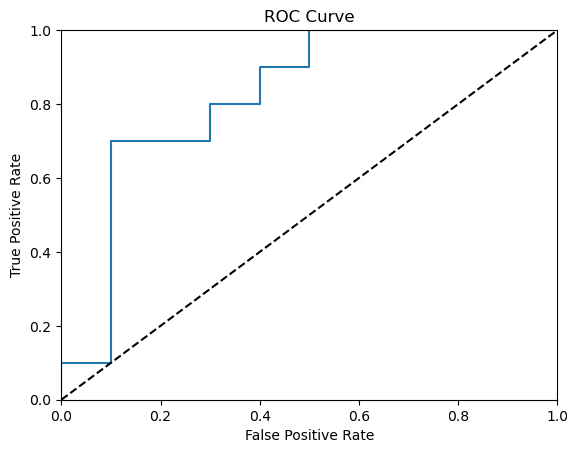

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)


data = pd.read_csv('/kaggle/input/placement/placement.csv')

X = data.drop('placement', axis=1)  # Features
y = data['placement']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegressionFromScratch()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))

scores = np.dot(X_test, logreg.weights) + logreg.bias

probabilities = sigmoid(scores)

fpr, tpr, thresholds = roc_curve(y_test, probabilities)

auc = roc_auc_score(y_test, probabilities)
print('AUC Score:', auc)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()





**KNN CLASSIFIER**

**Using libraries**

Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


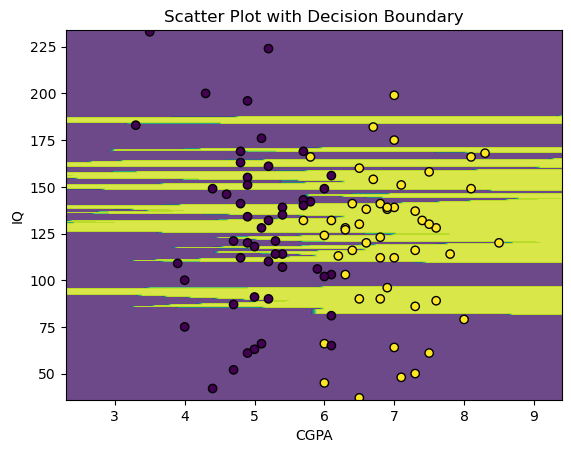

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('/kaggle/input/placement/placement.csv')

X = data[['cgpa', 'iq']]  
y = data['placement']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)
print(report)



x_min, x_max = X['cgpa'].min() - 1, X['cgpa'].max() + 1
y_min, y_max = X['iq'].min() - 1, X['iq'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X['cgpa'], X['iq'], c=y, edgecolors='k')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot with Decision Boundary')
plt.show()


**From scratch**

Confusion Matrix:
[[37 13]
 [16 34]]
Accuracy: 0.71
Precision: 0.723404255319149
Recall: 0.68


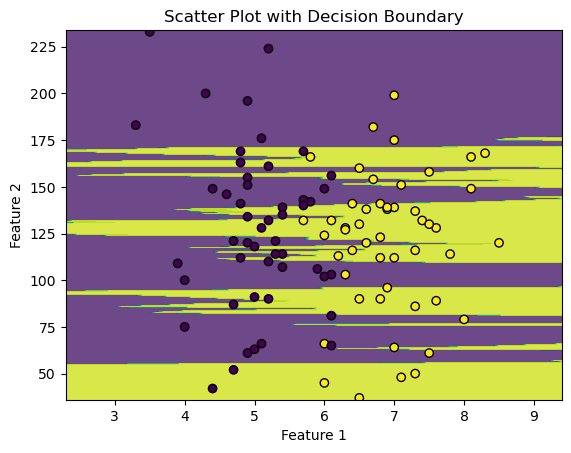

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNeighborsClassifierFromScratch:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = [euclidean_distance(sample, x_train) for x_train in self.X_train]
            
            k_indices = np.argsort(distances)[:self.n_neighbors]
            
            k_labels = [self.y_train[i] for i in k_indices]
            
            y_pred.append(max(set(k_labels), key=k_labels.count))
        
        return np.array(y_pred)

data = np.genfromtxt('/kaggle/input/placement/placement.csv', delimiter=',', skip_header=1)

X = data[:, [1, 2]]  # Features (Modify the indices according to your dataset)
y = data[:, -1]     # Target variable

knn = KNeighborsClassifierFromScratch(n_neighbors=5)

knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

y_pred = knn.predict(X)
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(cm)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()


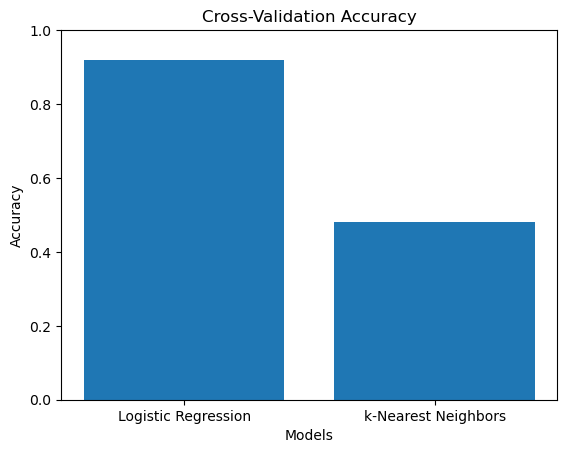

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

data = np.genfromtxt('/kaggle/input/placement/placement.csv', delimiter=',', skip_header=1)
X = data[:, :-1]  
y = data[:, -1]   

logistic_model = LogisticRegression()
logistic_scores = cross_val_score(logistic_model, X, y, cv=5)  
logistic_accuracy = np.mean(logistic_scores)

knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X, y, cv=5) 
knn_accuracy = np.mean(knn_scores)

models = ['Logistic Regression', 'k-Nearest Neighbors']
accuracy_scores = [logistic_accuracy, knn_accuracy]

plt.bar(models, accuracy_scores)
plt.ylim([0, 1])  
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.show()


Best k: 1


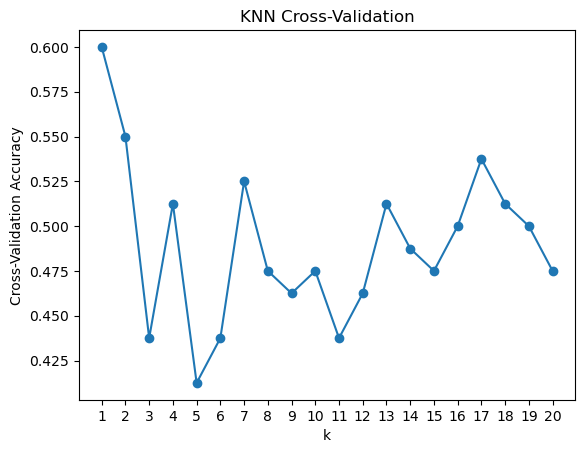

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

data = pd.read_csv('/kaggle/input/placement/placement.csv')

X = data[['cgpa', 'iq']]  # Features
y = data['placement']     # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = list(range(1, 21))  

accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  
    accuracy_scores.append(np.mean(scores))

best_k = k_values[np.argmax(accuracy_scores)]
print('Best k:', best_k)

plt.plot(k_values, accuracy_scores, 'o-')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation')
plt.xticks(k_values)
plt.show()
